In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import yfinance as yf
yf.pdr_override()

## Calculate return of portfolio with Scotiabank (25%), Enbridge(10%), Shopify(35%) and Dollarama(20%).

### Step 1: Adjucted closing prce for stocks.

In [19]:
tickers = ['BNS','ENB','SHOP','DOL']
start = dt.datetime(2022,1,1)
data = pdr.get_data_yahoo(tickers,start)

[*********************100%***********************]  4 of 4 completed


In [31]:
data.describe()

,BNS,DOL,ENB,SHOP
count,269.000000,269.000000,269.000000,269.000000
mean,58.054410,43.544640,40.905158,47.539877
std,7.900222,3.069441,2.231473,22.520220
min,45.572685,36.842422,35.067215,25.670000
25%,50.820087,41.208023,39.425610,33.389999
50%,58.175972,43.864006,40.970898,37.349998
75%,65.880516,46.319649,42.541485,57.951000
max,70.490768,48.849995,46.080143,136.313995


In [21]:
data = data["Adj Close"]

In [22]:
data.head(2)

,BNS,DOL,ENB,SHOP
Date,,,,
2022-01-03 00:00:00-05:00,67.513481,47.436821,36.869778,136.313995
2022-01-04 00:00:00-05:00,67.598541,47.952438,36.625420,122.185997


### Step 2: Calculate log return for portfolio.

In [23]:
portfolio = [.25,.10,.35,.20]

In [29]:
Portfolio_Return = np.sum(np.log(data/data.shift())*portfolio, axis =1)

In [30]:
Portfolio_Return.head()

Date
2022-01-03 00:00:00-05:00    0.000000
2022-01-04 00:00:00-05:00   -0.022815
2022-01-05 00:00:00-05:00   -0.005259
2022-01-06 00:00:00-05:00    0.005712
2022-01-07 00:00:00-05:00    0.004057
dtype: float64

<AxesSubplot:>

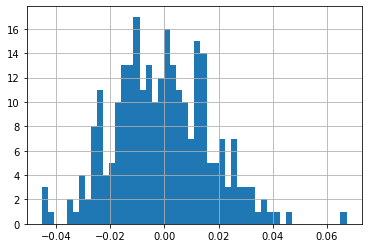

In [32]:
fig,ax = plt.subplots()
Portfolio_Return.hist(bins = 50, ax=ax)

### Step 3: Calculate Daily and Annualized sharpe ratio.

In [36]:
M = Portfolio_Return.mean()

In [37]:
S = Portfolio_Return.std()

In [41]:
Daily_Sharpe_Ratio = M/S
Daily_Sharpe_Ratio

-0.046938117005088785

In [43]:
Annual_Sharpe_Ratio = Daily_Sharpe_Ratio*269**.5
Annual_Sharpe_Ratio

-0.769842358361461